# Project Work 2


## The Digits Dataset

In [18]:
import numpy as np            
import pandas as pd           
import matplotlib.pyplot as plt                   
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()


In [4]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

## Exercise 1 - Describe the dataset

### Step 1:

In [5]:
# 1797 instances, each having 64 features
digits.data.shape


(1797, 64)

In [6]:
print digits.data

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


### Step 2:

In [7]:
#the number of digits types in the dataset are from 0 to 9.
print digits.target_names

[0 1 2 3 4 5 6 7 8 9]


### Step 3:

In [8]:
print digits.images[33]

[[ 0.  6. 13.  5.  8.  8.  1.  0.]
 [ 0.  8. 16. 16. 16. 16.  6.  0.]
 [ 0.  6. 16.  9.  6.  4.  0.  0.]
 [ 0.  6. 16. 16. 15.  5.  0.  0.]
 [ 0.  0.  4.  5. 15. 12.  0.  0.]
 [ 0.  0.  0.  3. 16.  9.  0.  0.]
 [ 0.  1.  8. 13. 15.  3.  0.  0.]
 [ 0.  4. 16. 15.  3.  0.  0.  0.]]


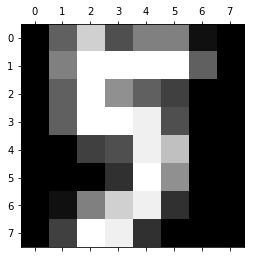

In [9]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[33]) 
plt.show() 

### Step 4:

In [25]:
digits_data = pd.DataFrame(digits.data)

digits_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [26]:
digits_subset = digits_data[[0,1,2,3,4]] 

In [27]:
digits_subset.head(10)

,0,1,2,3,4
0,0.0,0.0,5.0,13.0,9.0
1,0.0,0.0,0.0,12.0,13.0
2,0.0,0.0,0.0,4.0,15.0
3,0.0,0.0,7.0,15.0,13.0
4,0.0,0.0,0.0,1.0,11.0
5,0.0,0.0,12.0,10.0,0.0
6,0.0,0.0,0.0,12.0,13.0
7,0.0,0.0,7.0,8.0,13.0
8,0.0,0.0,9.0,14.0,8.0
9,0.0,0.0,11.0,12.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d81e190>,
      dtype=object)

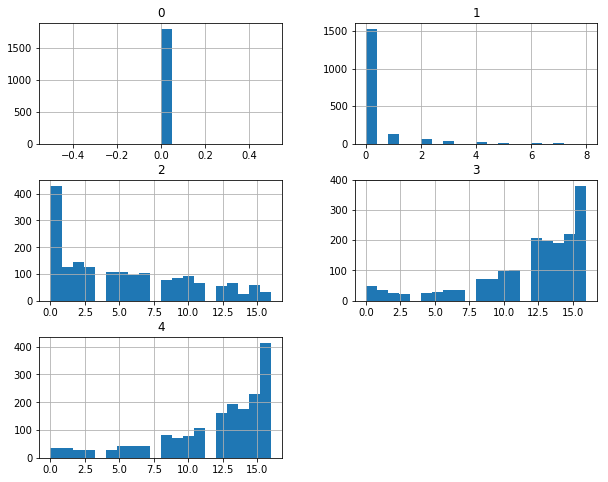

In [28]:
digits_subset.hist(bins=20, figsize=(10,8))

We can observe that the attributes have different scales.

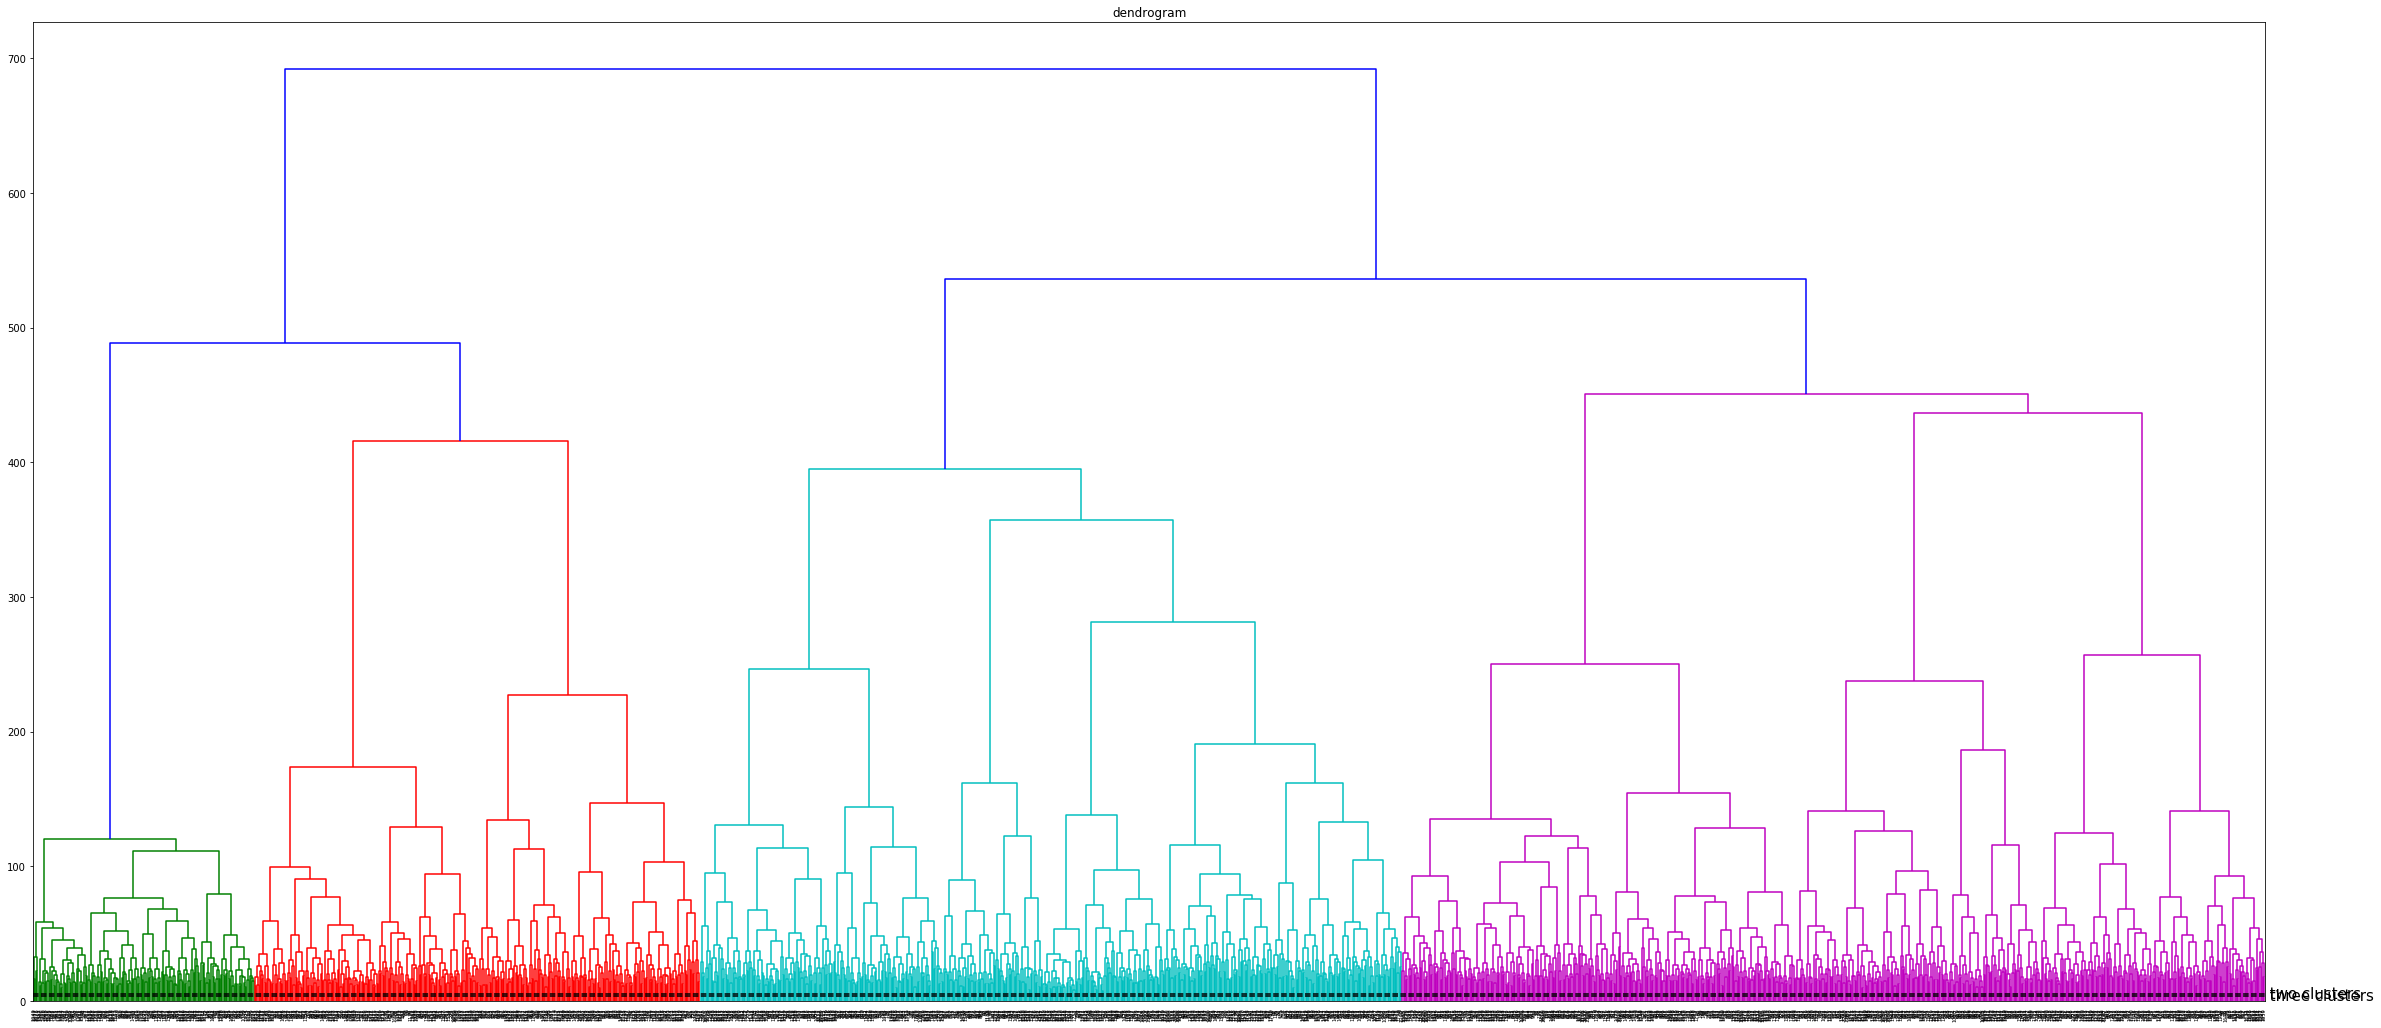

In [36]:


# import the dendrogram function and the ward clustering function from scipy
from scipy.cluster.hierarchy import dendrogram, ward

# apply the ward clustering to the data set
# The scipy ward function returns an array that specifies the distances bridged when performing agglomerative 
linkage_array = ward(digits_data)

# W plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array);

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [5, 5], '--', c='k')
ax.plot(bounds, [3.5, 3.5], '--', c='k')
ax.text(bounds[1], 5, ' two clusters', verticalalignment='center', fontdict={'size': 15})
ax.text(bounds[1], 3.5, ' three clusters', verticalalignment='center', fontdict={'size': 15})
plt.title("dendrogram")
plt.rcParams['figure.figsize']= (40, 18)

2 or 4 clusters.

In [39]:
# Initialize the HAC model, we consider as linkage modeL ward and 3 clusters. The Scikit-Learn implementation of HAC needs the 
# number of clusters 
model = AgglomerativeClustering(n_clusters=9, linkage = 'ward')
#del db_subset_scaled['agglomerative']

# HAC can not make predictions for new data points. Therefore HAC has not the predict method. To build the model and 
#get the labels we have to use the fit_predict method
clust_labels = model.fit_predict(digits_subset)

# Create the data set and add the labels
db_subset_scaled = pd.DataFrame(digits_subset)
agglomerative = pd.DataFrame(clust_labels)
# db_subset_scaled.insert((db_subset_scaled.shape[1]),'agglomerative',agglomerative)